In [1]:
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [2]:
df2 = pd.read_csv("emails.csv")
df2.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


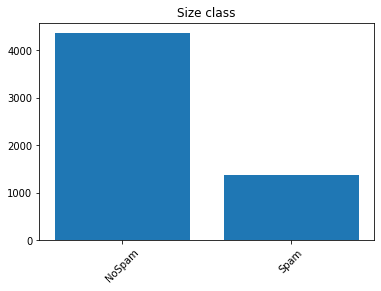

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
Totales = df2['spam'].value_counts()
plt.bar(['NoSpam', 'Spam'], Totales)
plt.xticks(rotation = 45)
plt.title('Size class') 
plt.show()

In [4]:
# Empty files
print("Tamaño del data frame: " + str(len(df2)))
print("Cantidad de filas vacías:")
print(df2.isnull().sum())

# Droppin empty files and len df2
result2 = df2.dropna()
result2 = df2[df2['text'] != ""]
print("\nTamaño del data frame sin vacíos: " + str(len(df2)))

Tamaño del data frame: 5728
Cantidad de filas vacías:
text    0
spam    0
dtype: int64

Tamaño del data frame sin vacíos: 5728


### EDA

In [16]:
from spacy.lang.en import English
nlp_es = spacy.load('en')

In [11]:
df2.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [12]:
spam_messages = df2[df2["spam"] == 1]["text"]
ham_messages = df2[df2["spam"] == 0]["text"]

In [13]:
ham_messages

1368    Subject: hello guys ,  i ' m " bugging you " f...
1369    Subject: sacramento weather station  fyi  - - ...
1370    Subject: from the enron india newsdesk - jan 1...
1371    Subject: re : powerisk 2001 - your invitation ...
1372    Subject: re : resco database and customer capt...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 4360, dtype: object

In [17]:
df2[df2["spam"] == 0].head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [18]:
spam_messages_pr=[]
ham_messages_pr=[]
for i in range(0,len(spam_messages)):
    spam_messages_pr.append(nlp_es(str(spam_messages[i])))
for j in range(1369,len(ham_messages)):
    ham_messages_pr.append(nlp_es(str(ham_messages[j])))

In [19]:
print(ham_messages_pr[3])

Subject: re : resco database and customer capture  steve ,  krishna from my group . krishna can also advise you on resco participation .  vince  steven r meyers @ ees  04 / 11 / 2000 04 : 51 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : re : resco database and customer capture  vince ,  i was not going to be involved directly in the meeting . who from either your  group or from resco marketing should participate ?  thanks ,  steve  vince j kaminski @ ect  04 / 11 / 2000 08 : 27 am  to : steven r meyers / hou / ees @ ees  cc : pinnamaneni krishnarao / hou / ect @ ect , vince j kaminski / hou / ect @ ect  subject : re : resco database and customer capture  steve ,  it makes sense to meet with abacus . retail marketing is very data intensive .  if you set up a meeting with them ,  please , let me know .  vince  steven r meyers @ ees  04 / 11 / 2000 08 : 17 am  to : timothy edward vail / hou / ees @ ees  cc : vince j kaminski / hou / ect @ ect  subject : resco database and c

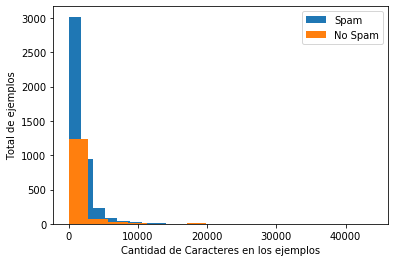

In [93]:
Spams = []
NoSpams = []
for clase, mensaje in zip(df2['spam'], df2['text']):
  #print(type(clase))
  if clase == 1:
    Spams.append(len(mensaje))
  else:
    NoSpams.append(len(mensaje))

plt.hist(NoSpams, bins=25)
plt.hist(Spams, bins=10)
plt.legend(['Spam', 'No Spam'])
plt.xlabel('Cantidad de Caracteres en los ejemplos') 
plt.ylabel('Total de ejemplos') 
plt.show()

In [122]:
# Gráfica de los tokens más utilizados para Spam
Palabras_Spam = {}

# Creamos el diccionario con los tokens y su frecuencia
for clase, mensaje in zip(df2['spam'], df2['text']):
  if clase == 1:
    for token in nlp_es(mensaje):
      if(Palabras_Spam.get(token.text) == None):
        Palabras_Spam.setdefault(token.text, 1)
      else:
        Palabras_Spam[token.text] += 1



In [121]:
# Gráfica de los tokens más utilizados para Spam
Palabras_Ham = {}

# Creamos el diccionario con los tokens y su frecuencia
for clase, mensaje in zip(df2['spam'], df2['text']):
  if clase == 0:
    for token in nlp_es(mensaje):
      if(Palabras_Ham.get(token.text) == None):
        Palabras_Ham.setdefault(token.text, 1)
      else:
        Palabras_Ham[token.text] += 1

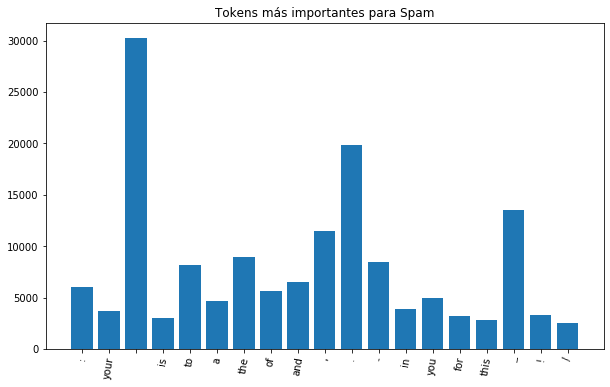

In [123]:
# Creamos un nuevo diccionario que no incluya los tokens menos frecuentes
Palabras_Spam2 = {}
for clave, valor in zip(Palabras_Spam.keys(), Palabras_Spam.values()):
  if(valor >= 2500):
    Palabras_Spam2.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(Palabras_Spam2.keys(), Palabras_Spam2.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

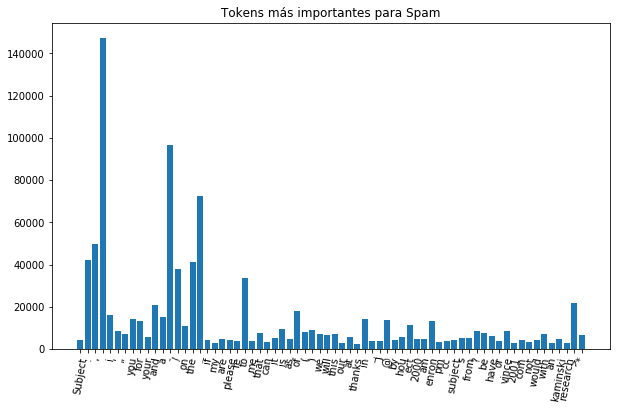

In [124]:
# Creamos un nuevo diccionario que no incluya los tokens menos frecuentes
Palabras_Ham2 = {}
for clave, valor in zip(Palabras_Ham.keys(), Palabras_Ham.values()):
  if(valor >= 2500):
    Palabras_Ham2.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(Palabras_Ham2.keys(), Palabras_Ham2.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

### Filtering stop words

### Podemos observar las palabras vacías y la puntuación en la lista, pero si lo necesitamos, podemos agregar más elementos, para hacer el filtro de acuerdo a las necesidades.

In [134]:
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'further', 'they', "couldn't", 'yourselves', 'any', 'should', 'only', 'my', 'and', 'between', 'in', 'if', "don't", 'the', 'most', 'again', 'at', "doesn't", 'when', 'under', 'shouldn', "hadn't", 'can', 'didn', 'shan', 'this', 'all', 'once', 'needn', 'out', 'more', 's', 'until', 'y', "it's", 'each', 'weren', 'we', "that'll", 'what', 'having', 'ain', 'where', 'itself', 'both', 'these', 'doing', 'myself', 'will', 'won', 'other', 'she', 'been', 'as', 'from', 'm', "shan't", 'not', "mightn't", 'some', "mustn't", 'who', 'over', 'haven', 'yours', 'had', 'am', 'during', 'them', "needn't", 'there', 'me', "wasn't", 'herself', 'why', 'but', 'so', 'such', 'be', 'whom', 'for', 'has', 'an', 'him', "haven't", 'your', 'he', 'then', 'doesn', 'because', "you'll", 'nor', 'is', 'was', 'through', 'against', 'on', 'it', 'up', 'than', 'her', 'before', 'ours', 'd', 'here', 'that', 'by', "should've", 'have', 'same', 'to', 'couldn', 'too', 'after', "aren't", 'you', 'just', 'mightn', 'which', 'hers', 'were', 'the

In [161]:
import string
puntuacion = list(string.punctuation)
puntuacion.extend(('``','0','1','2','3','4','5','6','7','8','9'))
print(puntuacion)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '``', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [129]:
word_tokens_spam = word_tokenize(str(spam_messages_pr)) 
  
filtered_sentence = [w for w in word_tokens_spam if not w in stop_words] 
words_spam=[i for i in filtered_sentence if i not in puntuacion]

print(words_spam) 


['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [137]:
words_spam_dic={}
for i in words_spam:
    if(words_spam_dic.get(i) == None):
        words_spam_dic.setdefault(i, 1)
    else:
        words_spam_dic[i] = words_spam_dic[i] + 1    

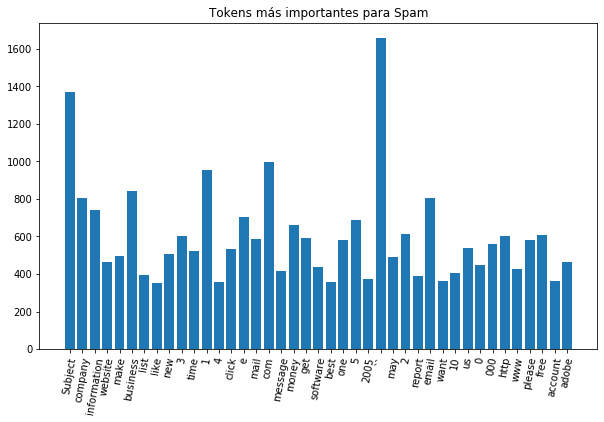

In [143]:
filtradas = {}
for clave, valor in zip(words_spam_dic.keys(), words_spam_dic.values()):
  if(valor >= 350):
    filtradas.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(filtradas.keys(), filtradas.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

In [135]:
word_tokens_ham = word_tokenize(str(ham_messages_pr)) 
  
filtered_sentence_ham = [w for w in word_tokens_ham if not w in stop_words] 
words_ham=[i for i in filtered_sentence_ham if i not in puntuacion]

print(words_ham[:100]) 

['Subject', 'sacramento', 'weather', 'station', 'fyi', 'forwarded', 'mike', 'roberts', 'hou', 'ect', '09', '20', '2000', '09', '06', 'scott', 'tholan', 'enron', '09', '19', '2000', '07', '57', 'pm', 'mark', 'tawney', 'hou', 'ect', 'ect', 'gary', 'taylor', 'hou', 'ect', 'ect', 'mike', 'roberts', 'hou', 'ect', 'ect', 'cc', 'chris', 'clark', 'na', 'enron', 'enron', 'subject', 'sacramento', 'weather', 'station', 'hey', 'guys', 'talking', 'contractor', 'build', 'us', 'weather', 'station', 'hopefully', 'quickly', 'placement', 'sacramento', 'california', 'variety', 'legal', 'contractor', 'operational', 'reasons', 'need', 'confirm', 'following', 'requirements', 'soon', 'possible', 'proceed', 'need', 'rainfall', 'snowfall', 'temperature', 'measurement', 'one', 'high', 'accuracy', 'commercially', 'available', 'weather', 'station', 'b', 'need', 'daily', 'feed', 'data', 'enron', 'weather', 'desk', 'mean', 'one', 'data', 'dump', 'set', 'time']


In [144]:
words_ham_dic={}
for i in words_ham:
    if(words_ham_dic.get(i) == None):
        words_ham_dic.setdefault(i, 1)
    else:
        words_ham_dic[i] = words_ham_dic[i] + 1    

In [160]:
for key, value in sorted(words_ham_dic.items(), key=lambda kv: kv[1], reverse=True):
    print("%s: %s" % (key, value))

enron: 9006
ect: 7694
vince: 5906
``: 5028
hou: 3748
2000: 3390
kaminski: 3314
please: 3019
com: 2993
Subject: 2991
subject: 2908
would: 2893
cc: 2669
j: 2576
pm: 2174
2001: 2102
research: 1820
thanks: 1720
know: 1570
2: 1534
group: 1509
10: 1501
time: 1477
energy: 1469
1: 1442
risk: 1423
power: 1406
may: 1381
let: 1255
3: 1229
meeting: 1212
new: 1204
like: 1203
shirley: 1183
01: 1126
houston: 1115
11: 1101
also: 1100
edu: 1094
information: 1073
00: 1068
e: 1061
30: 1058
corp: 1046
one: 1039
04: 1035
get: 1023
need: 1000
12: 992
message: 990
forwarded: 984
us: 960
management: 959
model: 915
forward: 914
th: 899
call: 888
4: 885
work: 879
market: 858
02: 844
03: 832
could: 807
mail: 804
08: 797
crenshaw: 793
regards: 792
conference: 791
business: 786
5: 780
week: 768
email: 764
713: 762
contact: 759
project: 755
09: 752
see: 746
price: 729
http: 726
development: 714
year: 712
stinson: 707
05: 704
john: 699
next: 691
thank: 688
university: 669
finance: 666
day: 662
look: 661
communicatio

court: 40
joint: 40
assignment: 40
jack: 40
language: 40
78712: 40
statement: 40
counterparties: 40
seyfried: 40
melinda: 40
pretty: 40
represent: 40
employment: 40
participant: 40
stewart: 40
impressed: 40
cases: 40
avoid: 40
petronas: 40
helping: 40
explain: 40
appear: 40
supatgiat: 40
vernon: 40
arrive: 40
industries: 40
compliance: 40
jaesoo: 40
infocast: 40
reasons: 39
passed: 39
enclosed: 39
410: 39
281: 39
easy: 39
cancel: 39
structuring: 39
sale: 39
promised: 39
liquidity: 39
georgia: 39
gatech: 39
karla: 39
commitments: 39
gold: 39
origination: 39
accepted: 39
primarily: 39
estimated: 39
restaurant: 39
kean: 39
luncheon: 39
learning: 39
sounds: 39
upgrade: 39
unsubscribe: 39
dollars: 39
remaining: 39
japanese: 39
implied: 39
east: 39
announced: 39
five: 39
elizabeth: 39
al: 39
washington: 39
ze: 39
offsite: 39
disclosure: 39
copier: 39
cmu: 39
agreements: 38
switch: 38
interviewed: 38
wind: 38
charged: 38
game: 38
till: 38
respect: 38
94305: 38
logistics: 38
play: 38
tani: 38


shannon: 15
correction: 15
skinner: 15
booking: 15
westbrook: 15
kallipoleos: 15
20537: 15
cy: 15
1678: 15
nicosia: 15
357: 15
892261: 15
339063: 15
hayden: 15
pdx: 15
manual: 15
copper: 15
interactive: 15
internships: 15
8394: 15
5727: 15
water: 15
deep: 15
ziplip: 15
carry: 15
moves: 15
admin: 15
jingming: 15
seeks: 15
somewhere: 15
ignore: 15
motion: 15
simultaneously: 15
ongoing: 15
headed: 15
knirel: 15
author: 15
entrepreneurship: 15
mallik: 15
graphs: 15
yeager: 15
train: 15
groupe: 15
carnes: 15
althea: 15
quentin: 15
priced: 15
pan: 15
palm: 15
reliable: 15
schematic: 15
chaired: 15
risky: 15
cox: 15
manufacturing: 15
databases: 15
amendment: 15
ramona: 15
prospect: 15
rdi: 15
guaranteed: 15
projector: 15
informative: 15
hosting: 15
incumbent: 15
hopley: 15
seppi: 15
proposing: 15
conrad: 15
revisions: 15
logging: 15
sept: 15
caused: 15
nordic: 15
delegates: 15
edits: 15
command: 15
sensitivity: 15
labbe: 15
inventories: 15
parameter: 15
fed: 15
grms: 15
facts: 15
budgeted: 15

electricxity: 8
gu: 8
driver: 8
length: 8
displayed: 8
encountered: 8
opens: 8
68: 8
949: 8
2241: 8
dutch: 8
cities: 8
binomial: 8
neutral: 8
mistakes: 8
brainstorm: 8
loyd: 8
bulletin: 8
1976: 8
organisation: 8
airlines: 8
ops: 8
bowen: 8
1112: 8
1991: 8
competing: 8
enhancement: 8
965: 8
2158: 8
655: 8
499: 8
415: 8
pge: 8
mix: 8
ezequiel: 8
luis: 8
demianenko: 8
paced: 8
intersection: 8
blocks: 8
rebekah: 8
203: 8
rtos: 8
hoecker: 8
pursuant: 8
exist: 8
tva: 8
gardner: 8
receives: 8
eam: 8
explicitly: 8
chairperson: 8
designate: 8
intervention: 8
alkhayat: 8
eprocurement: 8
sh: 8
pl: 8
mile: 8
assembly: 8
focussed: 8
structural: 8
dalton: 8
anxious: 8
consultation: 8
usd: 8
diskette: 8
behaviour: 8
77204: 8
ladies: 8
collections: 8
skip: 8
cs: 8
realistic: 8
salomon: 8
mends: 8
drs: 8
restaurants: 8
statistician: 8
creation: 8
visitor: 8
volatile: 8
reinsurers: 8
8006: 8
gasoline: 8
expects: 8
upward: 8
carter: 8
bryson: 8
terman: 8
liberty: 8
eventual: 8
peers: 8
gaylard: 8
680: 8


expanding: 5
foot: 5
ourso: 5
6366: 5
mis: 5
stability: 5
experiment: 5
avn: 5
tropical: 5
adaptive: 5
globally: 5
diagrams: 5
shirely: 5
varied: 5
occurred: 5
hedged: 5
gomez: 5
cts: 5
mornings: 5
titled: 5
pernoud: 5
apt: 5
231: 5
invesco: 5
dembo: 5
kertz: 5
1986: 5
wiley: 5
arguments: 5
increment: 5
protests: 5
piccadilly: 5
liu: 5
surveyed: 5
palazzi: 5
joshua: 5
murat: 5
engaged: 5
gratis: 5
diesel: 5
weatherdelta: 5
gathered: 5
accountability: 5
integrate: 5
nunez: 5
age: 5
3273: 5
imposing: 5
concluded: 5
lifting: 5
pragmatic: 5
312: 5
voltage: 5
eco: 5
miscellaneous: 5
7084: 5
ernie: 5
aust: 5
sheraton: 5
floppy: 5
obtaining: 5
abraham: 5
testimony: 5
daron: 5
costless: 5
pwr: 5
compressor: 5
occasion: 5
dozens: 5
197: 5
administrations: 5
7099: 5
hull: 5
tba: 5
0800: 5
climate: 5
cpt: 5
virginia: 5
brennan: 5
advisable: 5
concentrated: 5
alberto: 5
fronts: 5
kw: 5
accomodation: 5
goi: 5
grids: 5
coram: 5
british: 5
hsbc: 5
487: 5
workers: 5
mccurley: 5
merton: 5
vega: 5
under

hopkins: 4
signatures: 4
finalist: 4
spruce: 4
chuck: 4
meyn: 4
disconnect: 4
russia: 4
campuses: 4
zipper: 4
ennron: 4
eeos: 4
gmii: 4
disciplining: 4
reversed: 4
tables: 4
35163: 4
wielu: 4
raz: 4
firmy: 4
dry: 4
07747: 4
pastoral: 4
pruyt: 4
probabilistic: 4
pioneering: 4
smi: 4
265: 4
mouse: 4
targeting: 4
britannica: 4
amazon: 4
empty: 4
936: 4
conferenc: 4
concentrates: 4
explanations: 4
samaniego: 4
562: 4
houstoncellular: 4
samaniec: 4
hicago: 4
ramaswamy: 4
forming: 4
evans: 4
1234: 4
greeks: 4
dt: 4
dig: 4
complementary: 4
witter: 4
array: 4
installations: 4
productively: 4
challanges: 4
wakefield: 4
kansas: 4
migrate: 4
whatsoever: 4
collapse: 4
yumi: 4
delage: 4
os: 4
crawfish: 4
boil: 4
condensed: 4
renni: 4
escape: 4
occurrence: 4
upto: 4
liberalisation: 4
inexpensive: 4
stages: 4
questioned: 4
restructure: 4
criticism: 4
urge: 4
hc: 4
3036: 4
ergnote: 4
powercalib: 4
comcalib: 4
syntax: 4
indexswap: 4
exoticswap: 4
optindexswap: 4
pathutil: 4
visualize: 4
optdiffswap: 4


mcgee: 3
mondays: 3
wednesdays: 3
demers: 3
epstein: 3
packard: 3
boudreaux: 3
relax: 3
norman: 3
shults: 3
9975: 3
gt: 3
thornton: 3
biographies: 3
881: 3
975: 3
instructional: 3
expressway: 3
stadium: 3
arts: 3
weighing: 3
earned: 3
1987: 3
5762: 3
shipper: 3
impediment: 3
donor: 3
retains: 3
7408: 3
welcomed: 3
apartments: 3
kingdom: 3
rosenberg: 3
summarizing: 3
literally: 3
baggerly: 3
despatch: 3
chenvinc: 3
captive: 3
10017: 3
worrying: 3
opf: 3
coffer: 3
entail: 3
235: 3
onsite: 3
mayfield: 3
3264: 3
feagan: 3
woodway: 3
durham: 3
freeway: 3
espionage: 3
purswell: 3
woody: 3
cabc: 3
awareness: 3
fcpa: 3
streamlines: 3
doj: 3
ftc: 3
enforcement: 3
irrelevant: 3
emphasizing: 3
lessen: 3
cautioned: 3
imply: 3
satisfied: 3
warrant: 3
catawba: 3
282: 3
pepco: 3
er: 3
jurisdictional: 3
deferral: 3
presas: 3
lingo: 3
mirror: 3
indications: 3
overly: 3
beer: 3
hogarth: 3
katz: 3
pdfs: 3
buttons: 3
9750: 3
determines: 3
proof: 3
138: 3
pt: 3
deviate: 3
clinton: 3
lindsey: 3
kgme: 3
gree

271619: 2
271675: 2
271677: 2
271679: 2
271733: 2
271737: 2
271739: 2
271742: 2
271745: 2
271753: 2
271763: 2
271765: 2
271767: 2
271777: 2
272972: 2
concur: 2
mjaafar: 2
syed: 2
cacciatore: 2
grip: 2
reviewmeister: 2
isdn: 2
standalone: 2
polycom: 2
lays: 2
bottleneck: 2
discretized: 2
gemanix: 2
drafted: 2
2224: 2
208: 2
fame: 2
casta: 2
bergsieker: 2
trending: 2
trough: 2
realities: 2
med: 2
bind: 2
3185: 2
7917: 2
mcleroy: 2
8066: 2
9948: 2
reyna: 2
9617: 2
noticeably: 2
drum: 2
jbig: 2
880: 2
handset: 2
workgroup: 2
leasing: 2
terminates: 2
cancellable: 2
ikon: 2
1266: 2
5496: 2
eafrank: 2
marimon: 2
6601: 2
6676: 2
dependant: 2
geoff: 2
happiness: 2
arshak: 2
sarkissian: 2
converged: 2
corteselli: 2
tailor: 2
coil: 2
arkansas: 2
geographically: 2
markham: 2
bpd: 2
seabreeze: 2
deepwater: 2
teppco: 2
propylene: 2
belvieu: 2
prematurely: 2
vegas: 2
marketed: 2
planet: 2
pradhan: 2
conner: 2
cantrell: 2
alonso: 2
cutsforth: 2
mccaffrey: 2
579: 2
hms: 2
relaxing: 2
treasuryconnect: 2

mischke: 2
pratt: 2
flexmode: 2
leonard: 2
pressed: 2
arb: 2
boilerplate: 2
subcontract: 2
subcontractor: 2
disadvantage: 2
unjust: 2
clearing: 2
capping: 2
cited: 2
californians: 2
lacked: 2
slowing: 2
symbol: 2
beau: 2
bau: 2
bou: 2
brigham: 2
canfibre: 2
cfgl: 2
carrizo: 2
crzo: 2
costilla: 2
cose: 2
crown: 2
croe: 2
cynet: 2
cyne: 2
cypress: 2
cyz: 2
esenjay: 2
esnj: 2
idf: 2
ihii: 2
inland: 2
inln: 2
kafus: 2
ks: 2
nakornthai: 2
nsm: 2
paladin: 2
plr: 2
ld: 2
geophysical: 2
pgeof: 2
plg: 2
quanta: 2
qsri: 2
kwk: 2
saxon: 2
sxn: 2
startech: 2
seh: 2
syntroleum: 2
synm: 2
tejon: 2
trc: 2
texp: 2
transcoastal: 2
tcms: 2
prohibitions: 2
31939: 2
situations: 2
fro: 2
improves: 2
scalar: 2
displacement: 2
optstripspreadopt: 2
backward: 2
eapo: 2
easo: 2
espreadapo: 2
espreadaso: 2
ecrackapo: 2
apo: 2
aso: 2
fixing: 2
grimm: 2
gilson: 2
hardeep: 2
luthra: 2
977: 2
breadth: 2
landscape: 2
broadening: 2
milnthorp: 2
leff: 2
deffner: 2
derrick: 2
vickers: 2
robina: 2
barker: 2
rieker: 2
mit

secondment: 2
weron: 2
homer: 2
acquaintance: 2
dottie: 2
nopr: 2
calhoun: 2
avenues: 2
rigour: 2
flagged: 2
allure: 2
crop: 2
securitized: 2
cbot: 2
grannan: 2
rec: 2
chnage: 2
oquinn: 2
frontpage: 2
zealot: 2
su: 2
minolta: 2
respondents: 2
mdu: 2
mnd: 2
coastal: 2
coc: 2
staggering: 2
petroleos: 2
954: 2
6423: 2
9260: 2
9069: 2
mbothwell: 2
vni: 2
celebrates: 2
duplexing: 2
rog: 2
particulars: 2
instigated: 2
chile: 2
rollup: 2
0999: 2
emeet: 2
wex: 2
algorithmic: 2
myron: 2
buyback: 2
assemblyman: 2
polls: 2
backoffice: 2
cio: 2
ordinate: 2
normalized: 2
backwardation: 2
richards: 2
latour: 2
argent: 2
coat: 2
tradespark: 2
effectuate: 2
795: 2
wun: 2
296: 2
prize: 2
hsbcib: 2
fraternity: 2
mississippi: 2
dreyfus: 2
tpl: 2
devoting: 2
dispersion: 2
puhca: 2
asserted: 2
discriminatory: 2
kentucky: 2
otay: 2
ccc: 2
ccisol: 2
oaa: 2
21931: 2
boise: 2
idaho: 2
interfaces: 2
jeans: 2
neighborhood: 2
trainers: 2
dzieki: 2
tygodniu: 2
nikt: 2
ode: 2
mojego: 2
decyzje: 2
czyli: 2
moglem: 2

centrally: 1
extraction: 1
shortening: 1
geophysicist: 1
spacedata: 1
aylor: 1
adler: 1
sdt: 1
8377: 1
3767: 1
4364: 1
qqqzj: 1
3522: 1
9741: 1
bowne: 1
inspire: 1
zbol: 1
4060: 1
22343: 1
ametz: 1
uswebcks: 1
lovett: 1
alaina: 1
tollway: 1
tomball: 1
249: 1
fml: 1
gym: 1
reconfirmation: 1
lafayette: 1
administratively: 1
insightfull: 1
taylored: 1
writting: 1
utmost: 1
managemnet: 1
vastly: 1
multithreading: 1
heterogenous: 1
itm: 1
otm: 1
callibration: 1
cooperating: 1
rfps: 1
uploaded: 1
gilian: 1
niman: 1
pgn: 1
monet: 1
authrored: 1
frbny: 1
demottnow: 1
curr: 1
iss: 1
osler: 1
chauvet: 1
economies: 1
dirchrts: 1
fxc: 1
fxaro: 1
subscribing: 1
projecct: 1
inconsistency: 1
organizes: 1
newl: 1
occupy: 1
revealing: 1
affiliations: 1
5614: 1
guideline: 1
clog: 1
colour: 1
plenum: 1
overcrowding: 1
capel: 1
5198: 1
rosef: 1
poweriska: 1
speakerreg: 1
thats: 1
requst: 1
wnarongw: 1
colm: 1
gloves: 1
garbage: 1
childs: 1
youth: 1
girl: 1
troop: 1
bands: 1
lyou: 1
shirt: 1
baseball: 1
wa

wincety: 1
07102: 1
1897: 1
5049: 1
grading: 1
graders: 1
laast: 1
799: 1
801: 1
803: 1
septembre: 1
confronted: 1
innocent: 1
reinsurer: 1
804: 1
dividing: 1
blurred: 1
805: 1
paradise: 1
domiciles: 1
niches: 1
806: 1
registernow: 1
abundantly: 1
wayside: 1
evantage: 1
evantagenow: 1
unified: 1
812: 1
jeopardising: 1
8673: 1
silberman: 1
8186: 1
asilberman: 1
biehl: 1
reishus: 1
replay: 1
multimedia: 1
gambles: 1
4544: 1
6675: 1
2929: 1
22042: 1
agri: 1
marke: 1
respondt: 1
deroin: 1
7122: 1
adminsitrative: 1
517: 1
5617: 1
eglobal: 1
lacking: 1
abandon: 1
rescues: 1
defectors: 1
erequests: 1
folowing: 1
tops: 1
employ: 1
typesetter: 1
confernece: 1
slack: 1
58322: 1
peoples: 1
poaching: 1
flaming: 1
sacchi: 1
hartfield: 1
eod: 1
excerpted: 1
preferencing: 1
abouts: 1
employs: 1
vod: 1
reviewmovies: 1
rosenkranz: 1
acacia: 1
solana: 1
92075: 1
4678: 1
3930: 1
000000000013287: 1
latitude: 1
cement: 1
expeditious: 1
2103: 1
classmates: 1
directcustserve: 1
5908: 1
51002180: 1
weight: 1


critiques: 1
watered: 1
appendage: 1
pathetic: 1
ignorant: 1
devoid: 1
educator: 1
reworded: 1
revolved: 1
encap: 1
dire: 1
edges: 1
textbooks: 1
incent: 1
personably: 1
accountable: 1
businessman: 1
entreprenuership: 1
foremost: 1
oppurtunites: 1
quantative: 1
managements: 1
insudtry: 1
dynemic: 1
excitements: 1
enginering: 1
pertained: 1
speculating: 1
bridging: 1
inject: 1
practicality: 1
underdeliver: 1
lieu: 1
nuances: 1
kerch: 1
janine: 1
juggins: 1
sangster: 1
holland: 1
toby: 1
jeanie: 1
slone: 1
regan: 1
clerks: 1
keyed: 1
romulus: 1
rudolf: 1
wolff: 1
jhrc: 1
rkjjz: 1
weatherol: 1
conspired: 1
occuring: 1
energetic: 1
entailing: 1
vincek: 1
tml: 1
greenway: 1
ydhallui: 1
elora: 1
yongcho: 1
rooml: 1
pheasant: 1
burnett: 1
crane: 1
hermans: 1
coincident: 1
complication: 1
stoft: 1
queensl: 1
negligence: 1
photocopying: 1
privilege: 1
destroyed: 1
standardizing: 1
synchronization: 1
retrieval: 1
approximations: 1
pdes: 1
rsbaker: 1
dgriffin: 1
genieand: 1
agerhardt: 1
pkftexas:

cropcast: 1
5246: 1
massong: 1
earnestly: 1
imf: 1
busiest: 1
mutinational: 1
signifiantly: 1
formatting: 1
undone: 1
spacious: 1
painters: 1
cage: 1
wise: 1
debut: 1
sits: 1
formulates: 1
appropriately: 1
fruit: 1
diagramming: 1
pointer: 1
perm: 1
sketching: 1
wilton: 1
morawitz: 1
freer: 1
sliding: 1
neatly: 1
keeter: 1
739: 1
rcs: 1
recharge: 1
imputting: 1
yanna: 1
overwritten: 1
horns: 1
2523: 1
dolar: 1
patolia: 1
756: 1
kakani: 1
preferance: 1
pregnant: 1
checkup: 1
nausea: 1
pallavi: 1
enjoing: 1
000000000005168: 1
381: 1
9987: 1
realtionship: 1
chismar: 1
hedgeing: 1
tieds: 1
ona: 1
adgas: 1
foreighn: 1
brgds: 1
respons: 1
chalk: 1
observable: 1
3681: 1
cavendish: 1
31935: 1
leola: 1
barnett: 1
initials: 1
jsov: 1
baraniuk: 1
richb: 1
krull: 1
wcit: 1
4262: 1
reponsible: 1
leppards: 1
amex: 1
nascent: 1
undertake: 1
rajat: 1
lcg: 1
investigator: 1
mcleod: 1
mhb: 1
kure: 1
encotech: 1
pechman: 1
855: 1
2628: 1
547: 1
6016: 1
wkshp: 1
breakout: 1
leeway: 1
revalue: 1
korea: 1
ju

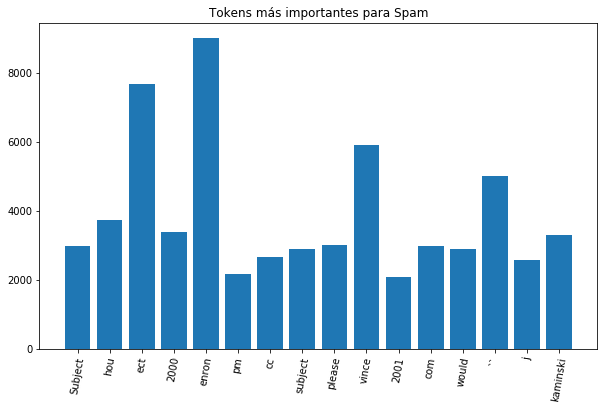

In [155]:
filtradas_ham = {}
for clave, valor in zip(words_ham_dic.keys(), words_ham_dic.values()):
  if(valor >= 2000):
    filtradas_ham.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(filtradas_ham.keys(), filtradas_ham.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()